In [18]:
import pandas as pd
import numpy as np
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import pingouin

### Read data

In [19]:
sample_data = pd.read_feather(r"..\data\repub_votes_potus_08_12.feather") 
sample_data.head(3)

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367


### From Two samples to one

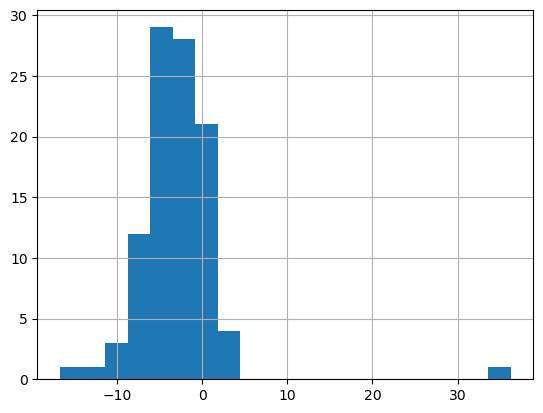

In [20]:
#sample_data = repub_percent_08_12

# Calculate the differences from 2008 to 2012
sample_data["diff"] = sample_data["repub_percent_08"] - sample_data["repub_percent_12"]

# Plot a histogram of diff with 20 bins
sample_data["diff"].hist(bins=20)
plt.show()

### Calculate the sample statistic of the difference 

* Revised hypotheses

Old hypotheses:

H0: mu_2008 - mu_2012 = 0

HA: mu_2008 - mu_2012 < 0

* New hypotheses:

H0: mu_diff = 0

HA: mu_diff < 0


<img src="..\data\t_paired_test.jpg" width="200" height="200">

In [21]:
alpha = 0.05

In [22]:
# Find the mean of the diff column
xbar_diff = sample_data["diff"].mean()

# Find the standard deviation of the diff column
s_diff = sample_data["diff"].std()

n_diff = len(sample_data)
degrees_of_freedom = n_diff - 1
t_stat = (xbar_diff-0) / np.sqrt(s_diff ** 2 / n_diff)
print("The t_stat is:{}".format(t_stat))

The t_stat is:-5.601043121928489


In [23]:
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p-value
print("The p-value is:{:.2f}".format(p_value))

if p_value <= alpha:
    print("Reject H0 in favour of HA")
else:
    print("Failed to reject H0")

The p-value is:0.00
Reject H0 in favour of HA


### Testing differences between two means using ttest()

In [24]:
# y=0: the hypothesised difference value
stats_df = pingouin.ttest(x=sample_data["diff"], y=0, alternative = "less")

p_value = stats_df["p-val"][0]

# Print the p-value
print("The p-value is:{:.2f}".format(p_value))

if p_value <= alpha:
    print("Reject H0 in favour of HA")
else:
    print("Failed to reject H0")

The p-value is:0.00
Reject H0 in favour of HA


### OR

In [25]:
stats_df = pingouin.ttest(x=sample_data["repub_percent_08"], 
               y=sample_data["repub_percent_12"],
               paired = True, alternative = "less")

p_value = stats_df["p-val"][0]

# Print the p-value
print("The p-value is:{:.2f}".format(p_value))

if p_value <= alpha:
    print("Reject H0 in favour of HA")
else:
    print("Failed to reject H0")

The p-value is:0.00
Reject H0 in favour of HA
